

---


# **Data Science Capstone project-week 2** 

---



In [13]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [41]:
df_char = pd.read_csv('caracteristics.csv', encoding='latin-1', low_memory=False)
df_pl = pd.read_csv('places.csv')
df_users = pd.read_csv(r'users.csv')
df_veh = pd.read_csv(r'vehicles.csv')
df_holi = pd.read_csv('holidays.csv')

In [16]:
df_char.columns

Index(['Num_Acc', 'an', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int', 'atm',
       'col', 'com', 'adr', 'gps', 'lat', 'long', 'dep'],
      dtype='object')

In [17]:
# dropping unrelevant columns.

df_char.drop(['adr','com', 'gps'], axis=1, inplace=True)
df_pl.drop(['v1', 'v2', 'pr', 'pr1', 'lartpc', 'larrout'], axis=1,  inplace=True)
df_veh.drop(['senc', 'occutc', 'obs', 'obsm', 'choc', 'manv', 'num_veh'], axis=1, inplace=True)
print(df_char.shape, df_pl.shape, df_veh.shape, df_users.shape)
df_pl

(26772, 13) (93648, 12) (272571, 2) (95131, 12)


,Num_Acc,catr,voie,circ,nbv,vosp,prof,plan,surf,infra,situ,env1
0,201600000001,3.0,39,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0
1,201600000002,3.0,39,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0
2,201600000003,3.0,1,2.0,2.0,0.0,1.0,3.0,2.0,0.0,3.0,99.0
3,201600000004,4.0,0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0
4,201600000005,4.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
93643,201500034212,4.0,0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
93644,201500034213,4.0,0,2.0,2.0,0.0,1.0,2.0,1.0,3.0,1.0,99.0
93645,201500034214,3.0,154,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0
93646,201500034215,4.0,0,2.0,2.0,0.0,1.0,1.0,1.0,5.0,1.0,3.0


In [18]:
df_char.columns = ['ID', 'year', 'month', 'day', 'time', 'lum', 'agg', 'int', 'atm', 'col', 'lat', 'long', 'dep']
df_pl.columns = ['ID','road_cat', 'road_num', 'traf_reg', 'num_lanes', 'res_lane', 'long_prof', 'shape', 'surf', 'infra', 'situation', 'school']
df = df_char.merge(df_pl, how='inner',on='ID')
df.head(5)

,ID,year,month,day,time,lum,agg,int,atm,col,lat,long,dep,road_cat,road_num,traf_reg,num_lanes,res_lane,long_prof,shape,surf,infra,situation,school
0,201600000001,16,2,1,1445,1,2,1,8,3,0.0,0.0,590.0,3.0,39,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0
1,201600000002,16,3,16,1800,1,2,6,1,6,0.0,0.0,590.0,3.0,39,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0
2,201600000003,16,7,13,1900,1,1,1,1,6,0.0,0.0,590.0,3.0,1,2.0,2.0,0.0,1.0,3.0,2.0,0.0,3.0,99.0
3,201600000004,16,8,15,1930,2,2,1,7,3,0.0,0.0,590.0,4.0,0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0
4,201600000005,16,12,23,1100,1,2,3,1,3,0.0,0.0,590.0,4.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0


In [19]:
categories = df_veh['catv'].value_counts().sort_index()
print(categories.shape)
categories

(24,)


1      12745
2       9965
3       1248
7     171478
10     14787
13       955
14      2815
15      2513
16       108
17      1719
20       240
21       588
30     11357
31      6133
32      5379
33     22337
34      3799
35        63
36       418
37      2011
38       565
39        91
40       402
99       855
Name: catv, dtype: int64

In [21]:
df_users = pd.read_csv(r'users.csv')
df_users.head(5)

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1.0,1.0,1.0,2.0,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,1.0,1.0,3.0,1.0,9.0,21.0,0.0,0.0,0.0,2001.0,A01
2,201600000002,1.0,1.0,3.0,1.0,5.0,11.0,0.0,0.0,0.0,1960.0,A01
3,201600000002,2.0,2.0,3.0,1.0,0.0,11.0,0.0,0.0,0.0,2000.0,A01
4,201600000002,3.0,2.0,3.0,2.0,0.0,11.0,0.0,0.0,0.0,1962.0,A01


In [22]:
df_users.drop(['place', 'sexe', 'trajet', 'locp', 'actp', 'etatp', 'num_veh'], axis=1, inplace=True)
df_users.columns = ['ID', 'catu', 'grav', 'secu', 'year_birth']
df_users.sort_values(by='ID').head(10)

,ID,catu,grav,secu,year_birth
190296,201500,NaN,NaN,NaN,NaN
133422,201500000001,1.0,3.0,21.0,1986.0
133423,201500000001,1.0,1.0,11.0,1953.0
133424,201500000002,1.0,3.0,21.0,1999.0
133425,201500000002,1.0,1.0,11.0,1965.0
133426,201500000003,1.0,3.0,21.0,1998.0
133427,201500000003,1.0,1.0,11.0,1986.0
133428,201500000004,1.0,1.0,11.0,1980.0
133429,201500000004,1.0,3.0,21.0,1994.0
133430,201500000005,1.0,1.0,11.0,1953.0


In [23]:
#number of users

num_users = df_users.ID.value_counts().sort_index(ascending=True)
num_users

201500          1
201500000001    2
201500000002    2
201500000003    2
201500000004    2
               ..
201600059428    2
201600059429    1
201600059430    2
201600059431    2
201600059432    3
Name: ID, Length: 84690, dtype: int64

In [24]:
df_users['ped'] = df_users['catu'].apply(lambda x: 1 if x==3 else 0)
df_users.head(5)

,ID,catu,grav,secu,year_birth,ped
0,201600000001,1.0,1.0,11.0,1983.0,0
1,201600000001,1.0,3.0,21.0,2001.0,0
2,201600000002,1.0,3.0,11.0,1960.0,0
3,201600000002,2.0,3.0,11.0,2000.0,0
4,201600000002,2.0,3.0,11.0,1962.0,0


In [25]:
df_users2 = df_users.groupby('ID').sum()
ped = df_users2.ped
print('Accidents in which pedestrians have been involved:')
df_users2.ped.value_counts()

Accidents in which pedestrians have been involved:


0     70373
1     13492
2       709
3        89
4        20
5         3
10        1
8         1
7         1
6         1
Name: ped, dtype: int64

In [26]:
# crical age

acc_year = df_users.ID.astype(str).str[:4] # year of the accident
age = acc_year.astype(int) - df_users['year_birth'] # age of the user
df_users['age']= age
df_users

,ID,catu,grav,secu,year_birth,ped,age
0,201600000001,1.0,1.0,11.0,1983.0,0,33.0
1,201600000001,1.0,3.0,21.0,2001.0,0,15.0
2,201600000002,1.0,3.0,11.0,1960.0,0,56.0
3,201600000002,2.0,3.0,11.0,2000.0,0,16.0
4,201600000002,2.0,3.0,11.0,1962.0,0,54.0
...,...,...,...,...,...,...,...
190292,201500025255,2.0,4.0,11.0,1995.0,0,20.0
190293,201500025255,1.0,4.0,11.0,1985.0,0,30.0
190294,201500025256,1.0,2.0,11.0,1966.0,0,49.0
190295,201500025257,1.0,1.0,11.0,1956.0,0,59.0


In [27]:
df2 = df_users[df_users['grav']==2]
deaths = df2['age'].value_counts()
deaths.sort_values(ascending=False)

total, suma, i = deaths.values.sum(), 0, 0

for num in deaths.values:
    suma += num
    per = (suma/total)*100
    if per<=50:
        i += 1
        percentage = per
print('A % 2.2f percent of a total of %4i deaths is found on the %2i first ages, being the deaths array sorted by number of deaths.' %(percentage,total,i))

A  49.61 percent of a total of 6422 deaths is found on the 28 first ages, being the deaths array sorted by number of deaths.


According to the WHO (World Health Organization), the mortality rates for road traffic injuries per 100,000 population in France, 2008 was 7.5. Taking into account the mean of 64 millions of population (from 2005 to 2016) living in the country and supposing a fixed rate, which has been decreasing in the past years, there should be around 57k deaths from 2005 to 2016. So we can confirm the data is accurate.

In [28]:
topdeaths = deaths.head(15)
print('Half of the deaths in a car accident are aged between % 2d and % 2.0i y.o.'
      % (topdeaths.index.min(), topdeaths.index.max()))
topdeaths

Half of the deaths in a car accident are aged between  18 and  44 y.o.


20.0    179
19.0    175
21.0    172
24.0    160
22.0    157
25.0    152
23.0    146
27.0    122
18.0    122
26.0    118
30.0    109
28.0    109
44.0    106
29.0    105
32.0    102
Name: age, dtype: int64

Text(0.5, 1.0, 'Total number of deahts by age from 2005 to 2016')

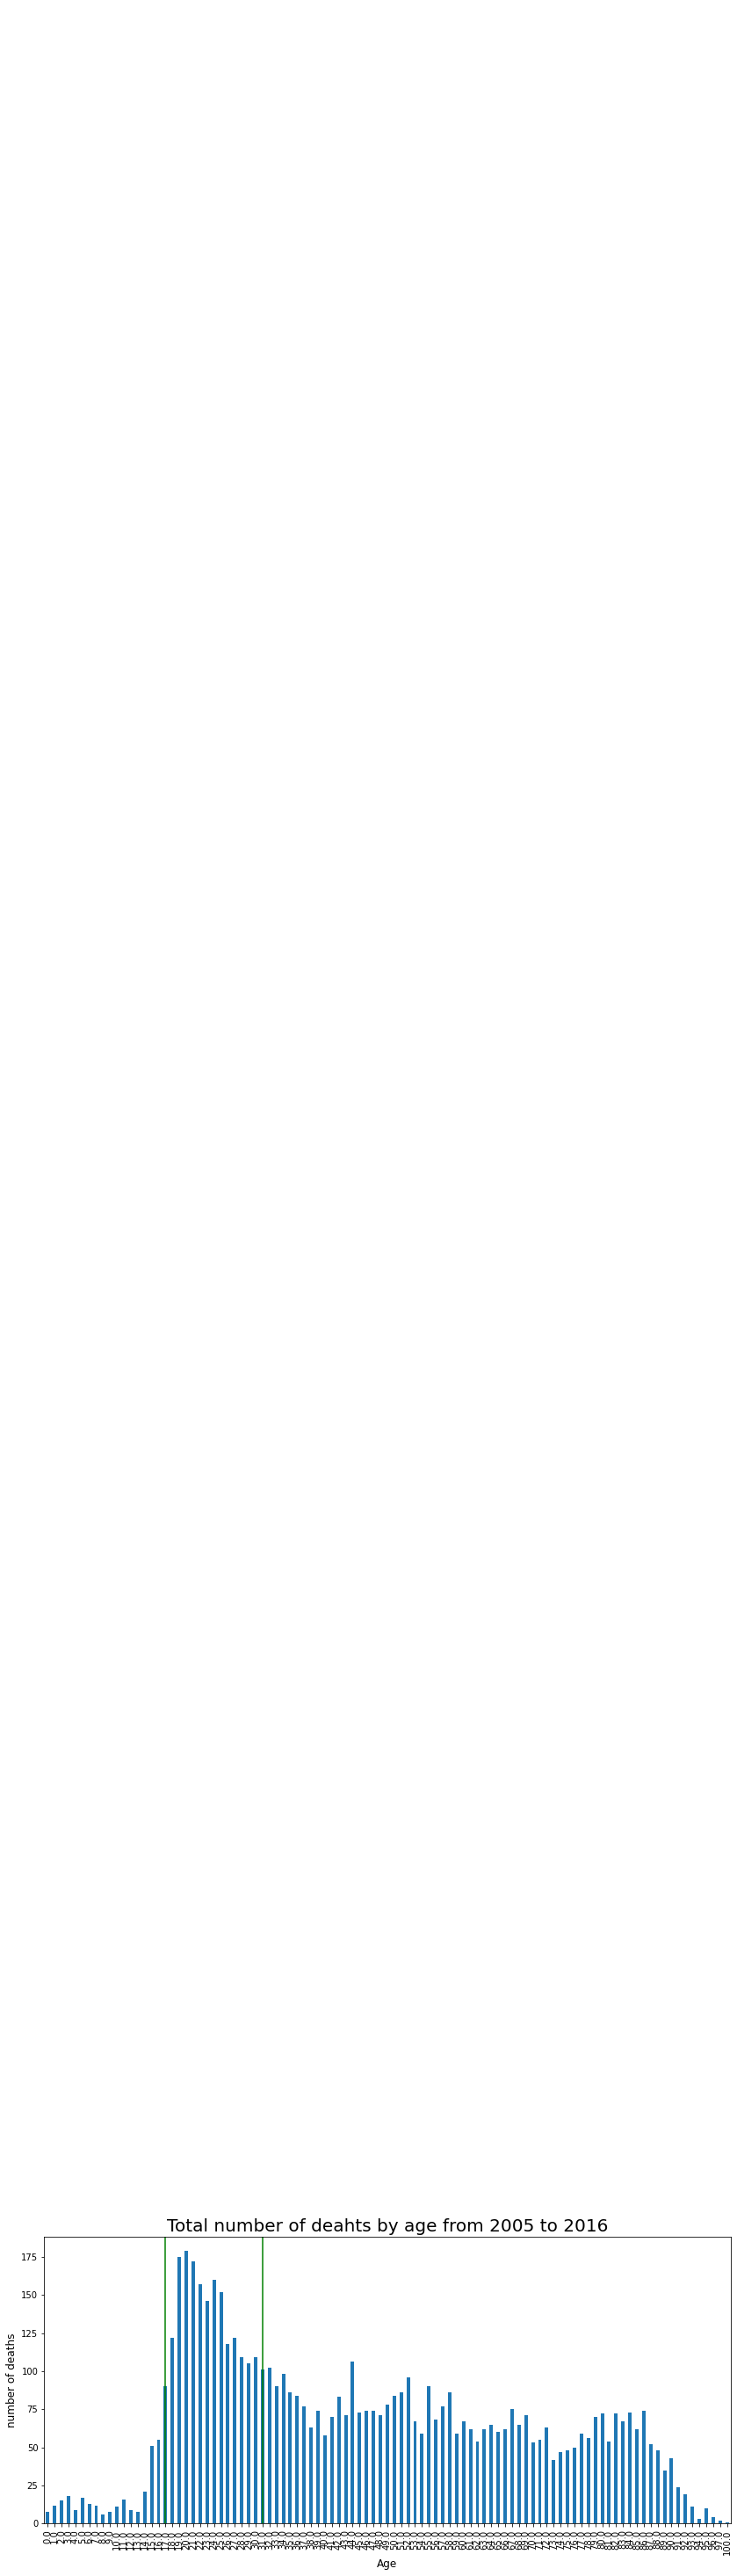

In [29]:

#Visualize the number of deaths by age

pd.DataFrame(deaths)
dplot=deaths.sort_index()
dplot.plot.bar(figsize=(14,6))

plt.annotate('  50% of deaths',
             color='r',
            xy=(17,1650),
            xytext=(31,1635),
            arrowprops=dict(arrowstyle='<->', color='r')
            )

plt.axvline(x=17, color='g', linestyle='-')
plt.axvline(x=31, color='g', linestyle='-')

plt.xlabel('Age', size=12)
plt.ylabel('number of deaths', size=12)
plt.title('Total number of deahts by age from 2005 to 2016', size=20)

People older than 82 are more likely to die with at least 1 out of 10 of the times, rising to beyond 35% in some cases.


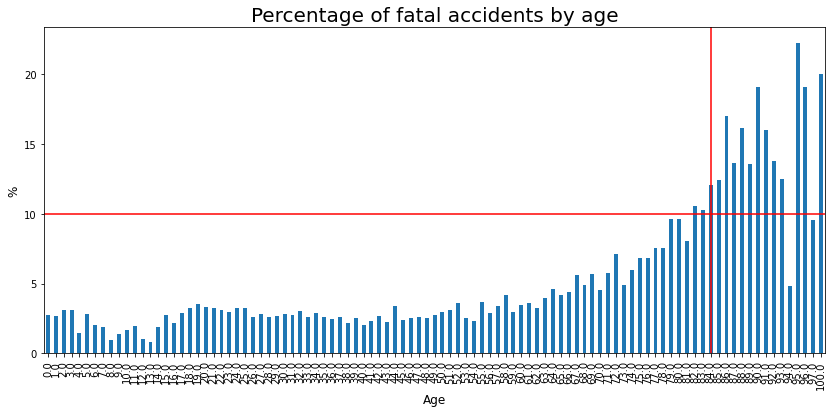

In [30]:
#dead age

death = df2['age'].value_counts().sort_index()
total = df_users['age'].value_counts().sort_index()
death_prop = (deaths/total)*100
d = death_prop.dropna()
minimum = d[d>9.9].index.min()
d.plot.bar(figsize=(14,6))
# plt.xticks(range(108)[0::2])
plt.title('Percentage of fatal accidents by age', size=20)
plt.xlabel('Age', size=12)
plt.ylabel('%', size=12)
plt.axhline(y=10, color='r')
plt.axvline(x=84, color='r')
print('People older than {0:2} are more likely to die\
 with at least 1 out of 10 of the times, rising to beyond 35% in some cases.'.format(int(minimum)))

In [31]:

df_users['crit_age'] = df_users['age'].apply(lambda x: 1 if 17<=x<=31 else 0)
df_users['dead_age'] = df_users['age'].apply(lambda x: 1 if x>84 else 0)

df_users.head(5)

,ID,catu,grav,secu,year_birth,ped,age,crit_age,dead_age
0,201600000001,1.0,1.0,11.0,1983.0,0,33.0,0,0
1,201600000001,1.0,3.0,21.0,2001.0,0,15.0,0,0
2,201600000002,1.0,3.0,11.0,1960.0,0,56.0,0,0
3,201600000002,2.0,3.0,11.0,2000.0,0,16.0,0,0
4,201600000002,2.0,3.0,11.0,1962.0,0,54.0,0,0


In [32]:
df2 = df_users.groupby('ID').sum().sort_index(ascending=True)
df2['crit_age1'] = df2['crit_age'].apply(lambda x: 1 if x>0 else 0)
df2['dead_age1'] = df2['dead_age'].apply(lambda x: 1 if x>0 else 0)
df2['ped1'] = df2['ped'].apply(lambda x: 1 if x>0 else 0)
df2['num_us'] = num_users
df2

,catu,grav,secu,year_birth,ped,age,crit_age,dead_age,crit_age1,dead_age1,ped1,num_us
ID,,,,,,,,,,,,
201500,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0,0,1
201500000001,2.0,4.0,32.0,3939.0,0,91.0,1,0,1,0,0,2
201500000002,2.0,4.0,32.0,3964.0,0,66.0,0,0,0,0,0,2
201500000003,2.0,4.0,32.0,3984.0,0,46.0,2,0,1,0,0,2
201500000004,2.0,4.0,32.0,3974.0,0,56.0,1,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
201600059428,4.0,5.0,21.0,3994.0,1,38.0,1,0,1,0,1,2
201600059429,1.0,4.0,21.0,1984.0,0,32.0,0,0,0,0,0,1
201600059430,2.0,5.0,32.0,3972.0,0,60.0,1,0,1,0,0,2



Last feature is the severity from the gravity feature of the users dataset. Currently it consists of 4 labels:

*Unscathed

*Dead

*Hospitalized Wonded

*Light Injury


My idea is to simplify it to two labels and sort them by gravity, giving 0 to all cases of unscathed or light injury and 1 to all cases of dead or hospitalized users. \ Then the severity of each accident will be equal to the maximum gravity of any of the users.

In [33]:
def change_grav(x):
    if x==1 or x==4:
        return 0
    else:
        return 1
df3 = df_users[['ID', 'grav']].copy()
df3['grav'] = df_users['grav'].apply(change_grav)
df3.sort_values(by='ID')

,ID,grav
190296,201500,1
133422,201500000001,1
133423,201500000001,0
133424,201500000002,1
133425,201500000002,0
...,...,...
133417,201600059431,0
133418,201600059431,0
133421,201600059432,0
133419,201600059432,0


In [34]:

severity = df3[['grav', 'ID']].groupby('ID').max().sort_index(ascending=True)
severity

,grav
ID,
201500,1
201500000001,1
201500000002,1
201500000003,1
201500000004,1
...,...
201600059428,0
201600059429,0
201600059430,0


In [35]:
df2['sev'] = severity
df2.reset_index(inplace=True)
df2

,ID,catu,grav,secu,year_birth,ped,age,crit_age,dead_age,crit_age1,dead_age1,ped1,num_us,sev
0,201500,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0,0,1,1
1,201500000001,2.0,4.0,32.0,3939.0,0,91.0,1,0,1,0,0,2,1
2,201500000002,2.0,4.0,32.0,3964.0,0,66.0,0,0,0,0,0,2,1
3,201500000003,2.0,4.0,32.0,3984.0,0,46.0,2,0,1,0,0,2,1
4,201500000004,2.0,4.0,32.0,3974.0,0,56.0,1,0,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84685,201600059428,4.0,5.0,21.0,3994.0,1,38.0,1,0,1,0,1,2,0
84686,201600059429,1.0,4.0,21.0,1984.0,0,32.0,0,0,0,0,0,1,0
84687,201600059430,2.0,5.0,32.0,3972.0,0,60.0,1,0,1,0,0,2,0
84688,201600059431,2.0,8.0,42.0,3984.0,0,48.0,2,0,1,0,0,2,0


In [36]:
print('Both data frames having same number of rows is an indicator that any accident has been left behind')
df.shape, df2.shape

Both data frames having same number of rows is an indicator that any accident has been left behind


((26772, 24), (84690, 14))

In [37]:
df = df.merge(df2[['ID','crit_age1', 'ped1','dead_age1', 'num_us', 'sev']], on='ID', how='left')
df

,ID,year,month,day,time,lum,agg,int,atm,col,lat,long,dep,road_cat,road_num,traf_reg,num_lanes,res_lane,long_prof,shape,surf,infra,situation,school,crit_age1,ped1,dead_age1,num_us,sev
0,201600000001,16,2,1,1445,1,2,1,8,3,0.0,0.0,590.0,3.0,39,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0,0,0,0,2,1
1,201600000002,16,3,16,1800,1,2,6,1,6,0.0,0.0,590.0,3.0,39,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0,0,0,3,1
2,201600000003,16,7,13,1900,1,1,1,1,6,0.0,0.0,590.0,3.0,1,2.0,2.0,0.0,1.0,3.0,2.0,0.0,3.0,99.0,1,1,0,2,1
3,201600000004,16,8,15,1930,2,2,1,7,3,0.0,0.0,590.0,4.0,0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0,1,0,0,3,1
4,201600000005,16,12,23,1100,1,2,3,1,3,0.0,0.0,590.0,4.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26767,201600026768,16,5,27,1720,1,2,1,1,2,4728795.0,-238283.0,440.0,4.0,NaN,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0,1,0,0,2,1
26768,201600026769,16,6,5,1823,1,2,6,1,7,4727957.0,-237813.0,440.0,4.0,0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1
26769,201600026770,16,6,30,1140,1,2,6,1,3,4725638.0,-231729.0,440.0,3.0,92,3.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0,0,0,0,2,0
26770,201600026771,16,7,4,1505,1,2,2,1,3,4724915.0,-231299.0,440.0,4.0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,3,1


**Date and Time**

In [38]:

from datetime import datetime 

dt = df[['ID','year', 'month', 'day', 'time' ]]
#weekday
date = (dt.year+2000)*10000+dt.month*100+dt.day
dt['date'] = pd.to_datetime(date, format='%Y%m%d')
dt['weekday'] = dt['date'].dt.weekday #weekday functin from datetime gives a number to each day of the week from 0 to 6.

#weekend
dt['weekend'] = dt['weekday'].apply(lambda x: 1 if x>4 else 0)

#night
# dt['night'] = dt['hhmm'].apply(lambda x: 1 if 700>x or x>2100 else 0) 

#holiday
dt.loc[dt.date.isin(df_holi.ds) , 'holiday'] = 1
dt.holiday.fillna(0, inplace=True)
dt.head(5)

,ID,year,month,day,time,date,weekday,weekend,holiday
0,201600000001,16,2,1,1445,2016-02-01,0,0,0.0
1,201600000002,16,3,16,1800,2016-03-16,2,0,0.0
2,201600000003,16,7,13,1900,2016-07-13,2,0,0.0
3,201600000004,16,8,15,1930,2016-08-15,0,0,1.0
4,201600000005,16,12,23,1100,2016-12-23,4,0,0.0


In [39]:
df = df.merge(dt[['ID', 'date', 'weekend', 'holiday']],on='ID', how='left')
df.drop(['year', 'month', 'day'], axis=1, inplace=True)
df.head()

,ID,time,lum,agg,int,atm,col,lat,long,dep,road_cat,road_num,traf_reg,num_lanes,res_lane,long_prof,shape,surf,infra,situation,school,crit_age1,ped1,dead_age1,num_us,sev,date,weekend,holiday
0,201600000001,1445,1,2,1,8,3,0.0,0.0,590.0,3.0,39,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0,0,0,0,2,1,2016-02-01,0,0.0
1,201600000002,1800,1,2,6,1,6,0.0,0.0,590.0,3.0,39,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0,0,0,3,1,2016-03-16,0,0.0
2,201600000003,1900,1,1,1,1,6,0.0,0.0,590.0,3.0,1,2.0,2.0,0.0,1.0,3.0,2.0,0.0,3.0,99.0,1,1,0,2,1,2016-07-13,0,0.0
3,201600000004,1930,2,2,1,7,3,0.0,0.0,590.0,4.0,0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0,1,0,0,3,1,2016-08-15,0,1.0
4,201600000005,1100,1,2,3,1,3,0.0,0.0,590.0,4.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,0,0,0,3,1,2016-12-23,0,0.0


In [40]:
df['time'] = df.time.div(100).apply(np.floor)

In [41]:
df.rename(columns={'crit_age1':'crit_age','dead_age1':'dead_age', 'ped1':'ped'},inplace=True)
df.to_csv('Data.csv')

To conclude this notebook, I saved the dataset on a .csv file on the same directory of work, so that I can use it for the following parts of the project.